# Heart Disease Prediction

### Will a patient have a 10 year risk of developing a cardio vascular diseases?

### Table of contents
1. [Introduction](#intro)
2. [Importing Libraries](#lib)
3. [Exploratory Data Analysis](#eda)
4. [Feature Selection](#feature_selection)
5. [Feature Scaling](#feature_scaling)
6. [Test - Train Split](#test_train)
7. [Resampling](#resample)
8. [Model Pipeline](#model)
9. [Modelling & Evaluation](#model_evaluate)
10. [Apply model](#apply)

## Introduction <a name="intro"></a>


**Objective:** 
Build a classification model that predicts heart disease in a subject. (note the target column to predict is &#39;TenYearCHD&#39; where CHD = Coronary heart disease)

**Source:**
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular
study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the
patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information.
It includes over 4,240 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* CigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BPMeds: whether or not the patient was on blood pressure medication (Nominal) 
* PrevalentStroke: whether or not the patient had previously had a stroke (Nominal) 
* PrevalentHyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* TotChol: total cholesterol level (Continuous) 
* SysBP: systolic blood pressure (Continuous) 
* DiaBP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* HeartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


# Importing Libraries <a name="lib"></a>

In [1]:
# importing some more libraries and magic functions

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [2]:
# import warnings filter
from warnings import simplefilter

# ignore all kinds of warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

## Exploratory Data Analysis <a name="eda"></a>

In [3]:
# read data
df = pd.read_csv('framingham.csv')

# first glimpse at data
df.head(15)

# data shape
df.shape

# data types
df.dtypes

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


(4240, 16)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Hence there is no duplicate values.

In [5]:
# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


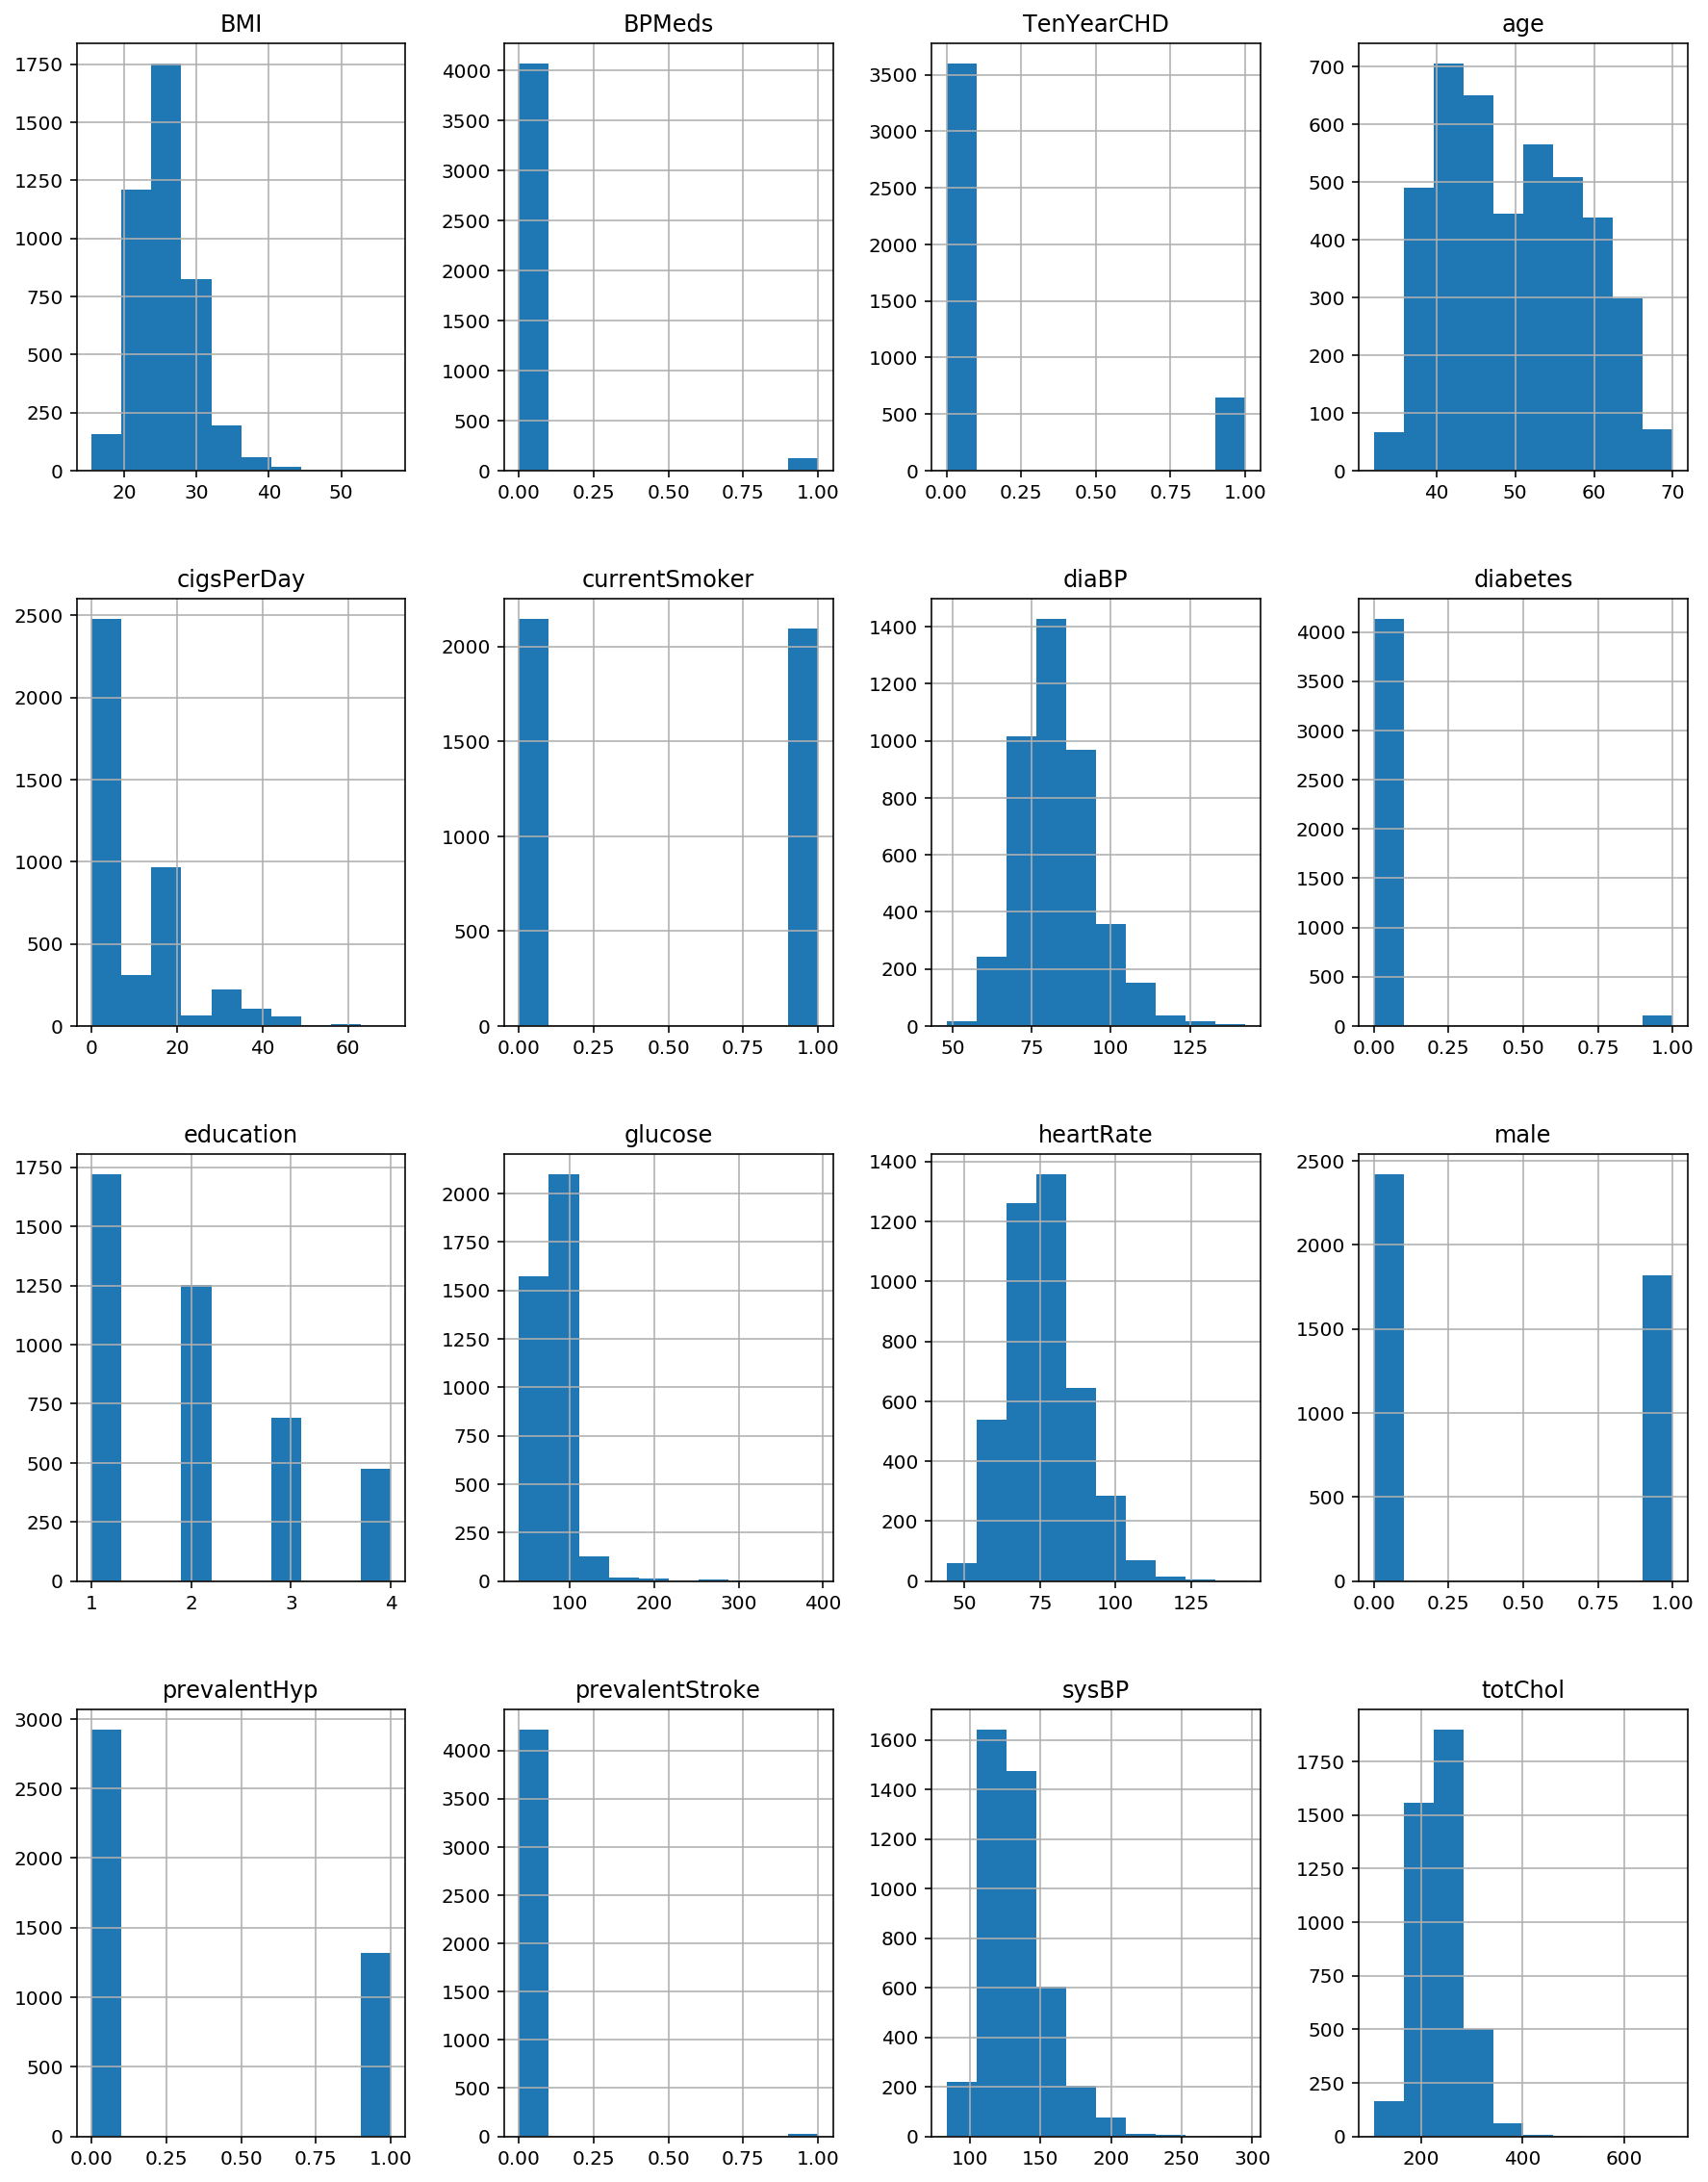

In [6]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()    # gca() used to get the current axes
df.hist(ax = ax);

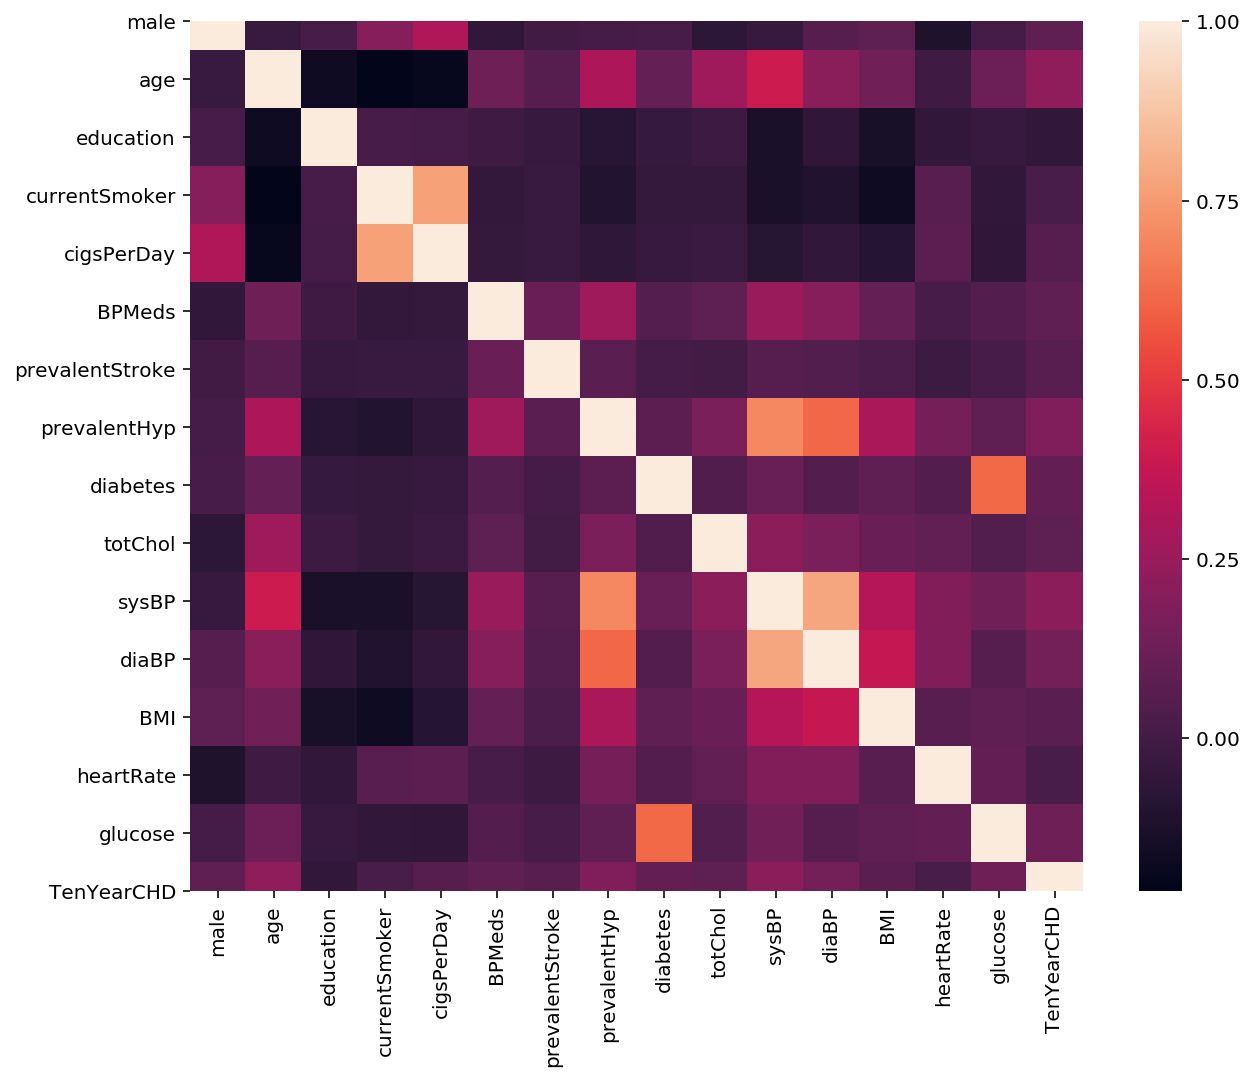

In [7]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
plt.figure(figsize=(10,8))
g=sns.heatmap(df.corr());

**Conclusions from Heatmap:**

We are dropping the column *education* because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [15]:
# Dropping columns education and glucose
df = df.drop(['education'], axis=1)

KeyError: "['education'] not found in axis"

In [ ]:
# Checking for more missing data 
df.isna().sum()

In [ ]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

## Feature Selection <a name="feature_selection"></a>

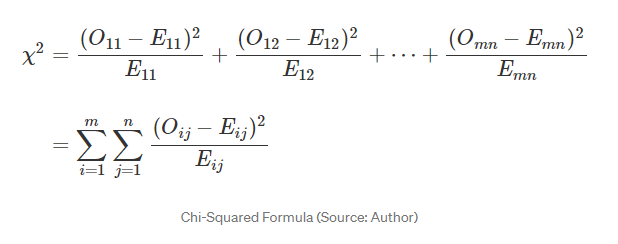

In [18]:
# Identify the features with the most importance for the outcome variable Heart Disease

# Feature Selection is the method of reducing the input variable to your model by using 
#     only relevant data and getting rid of noise in data. For example, classification model brings 
#     about 90% classification accuracy, the objective of feature selection is to select maybe 3 or 4 
#     out of the 8 attributes and still achieve similar accuracy.

# SelectKBest: selects the features accourding to the K highest score. For example, if you pass chi2
#   as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y
#   (assumed to be class labels). A small value mean the feature X is independent of y. A large value
#   means the feature X is non-randomly related to y, and so likely to provide important information.
from sklearn.feature_selection import SelectKBest

# chi2: chi2() is an chi-square continuous random variable and is used in statistics to test the 
#       independence of two events.
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e TenYearCHD

# apply SelectKBest class to extract top 10 best features (k=10)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [19]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.109932
13,glucose,402.409837
1,age,297.974980
8,totChol,252.958627
3,cigsPerDay,185.115196
10,diaBP,142.920436
6,prevalentHyp,82.342164
7,diabetes,31.711253
4,BPMeds,26.116583
0,male,19.178560


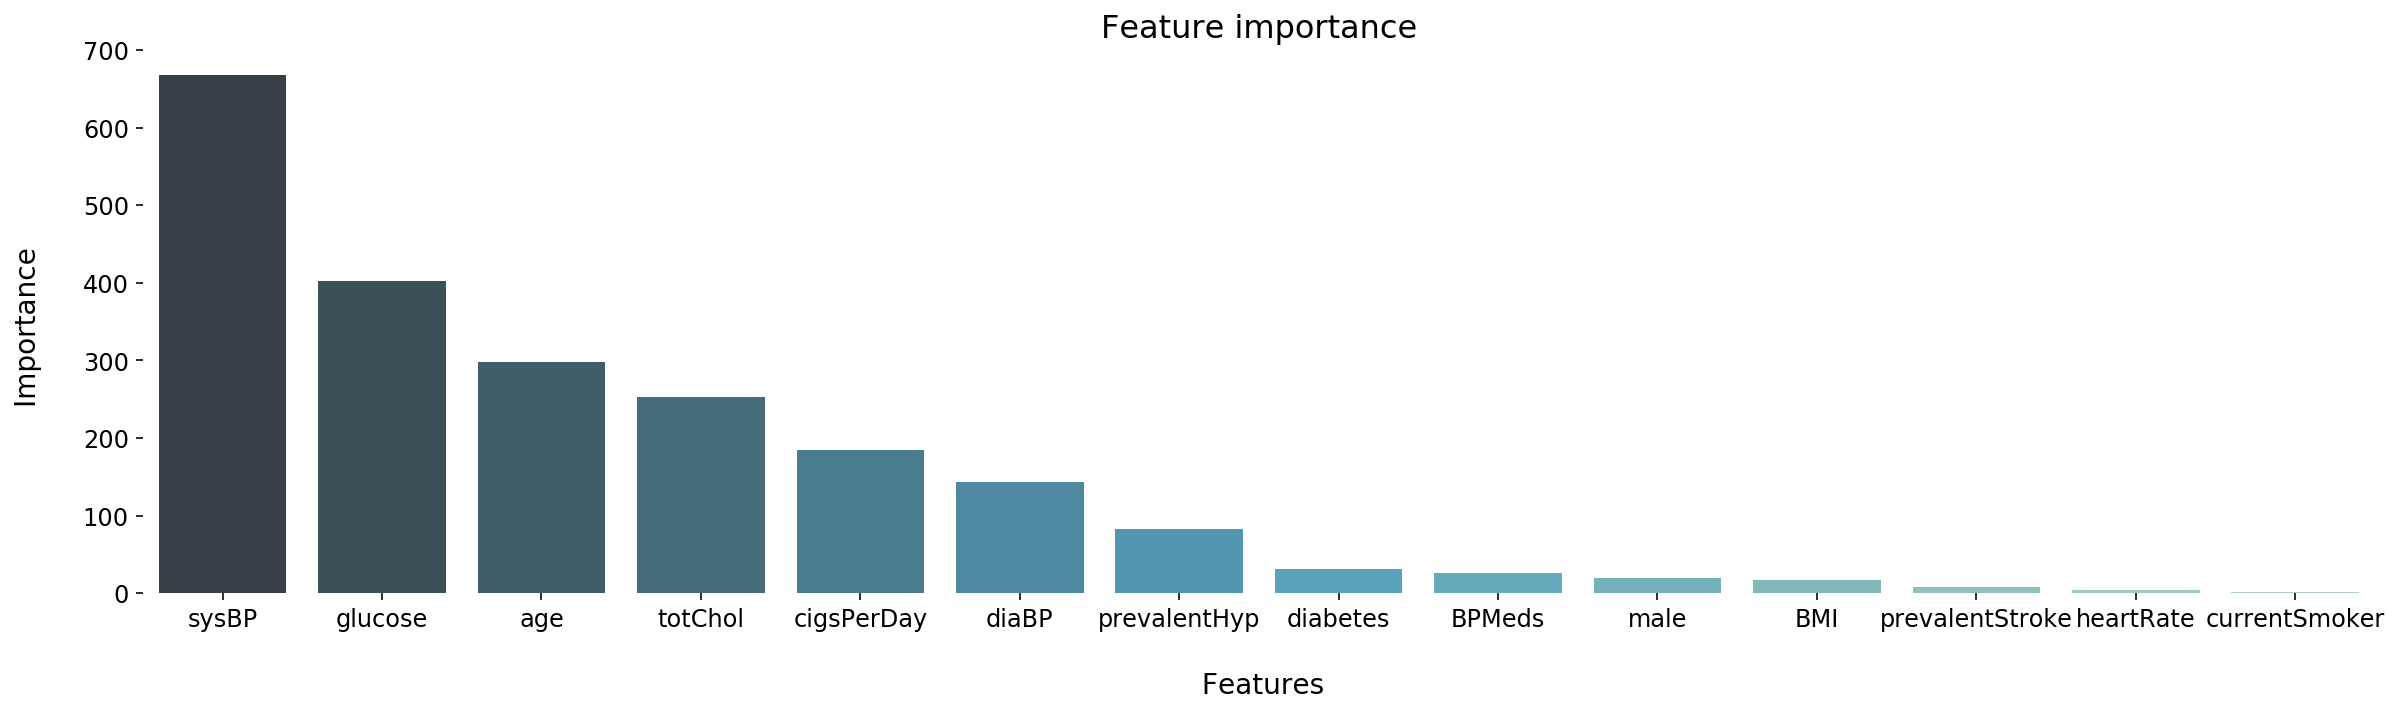

In [20]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [21]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

We will only keep those features that have the strongest relationship with the output variable. These features are:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

In [22]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


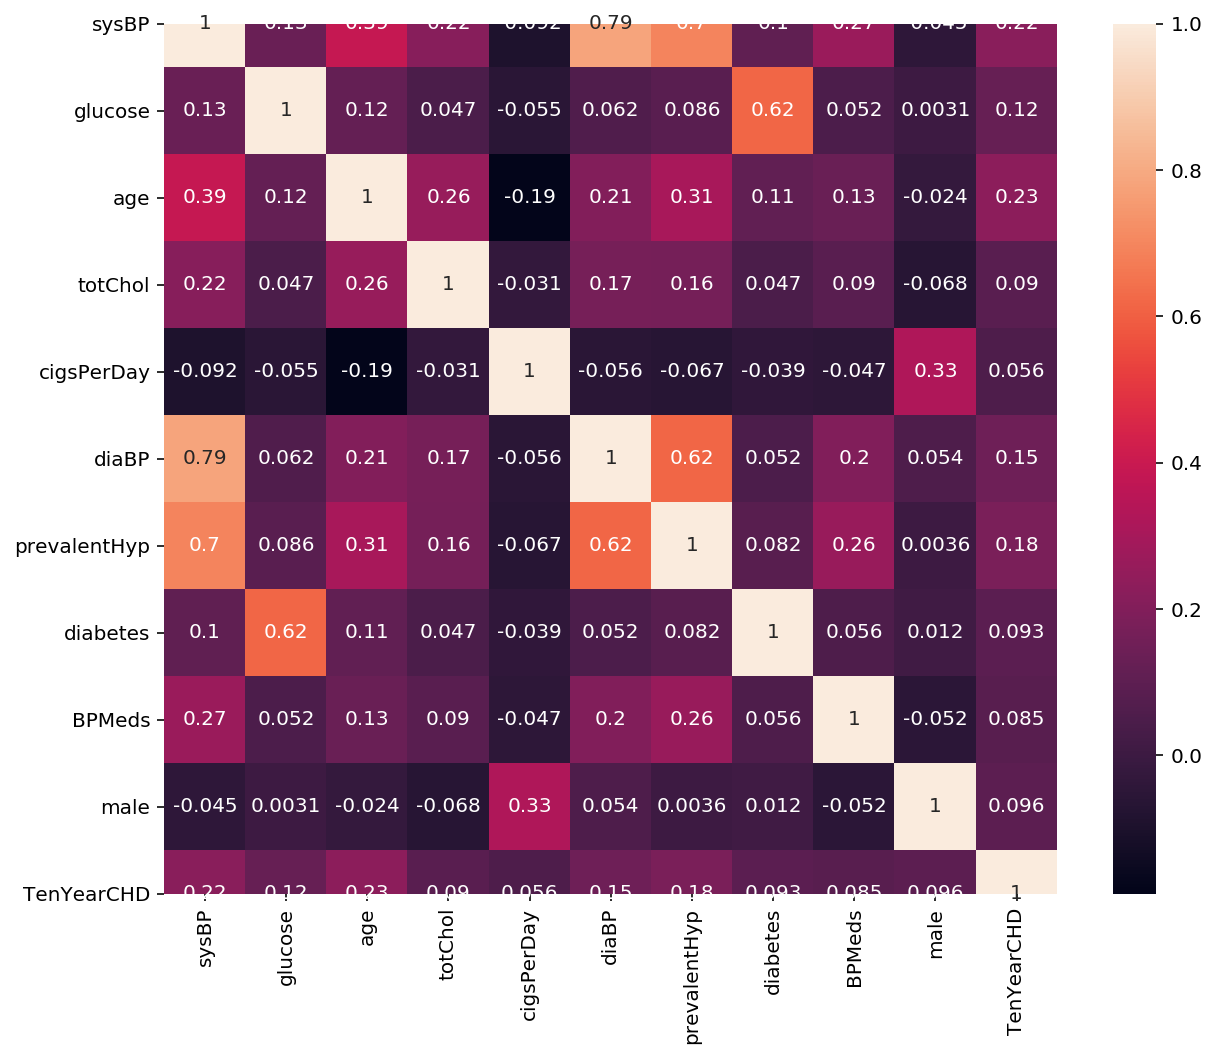

In [23]:
# Checking correlation again
df_corr = df.corr()
plt.figure(figsize=(10,8))
g=sns.heatmap(df.corr(),annot=True);

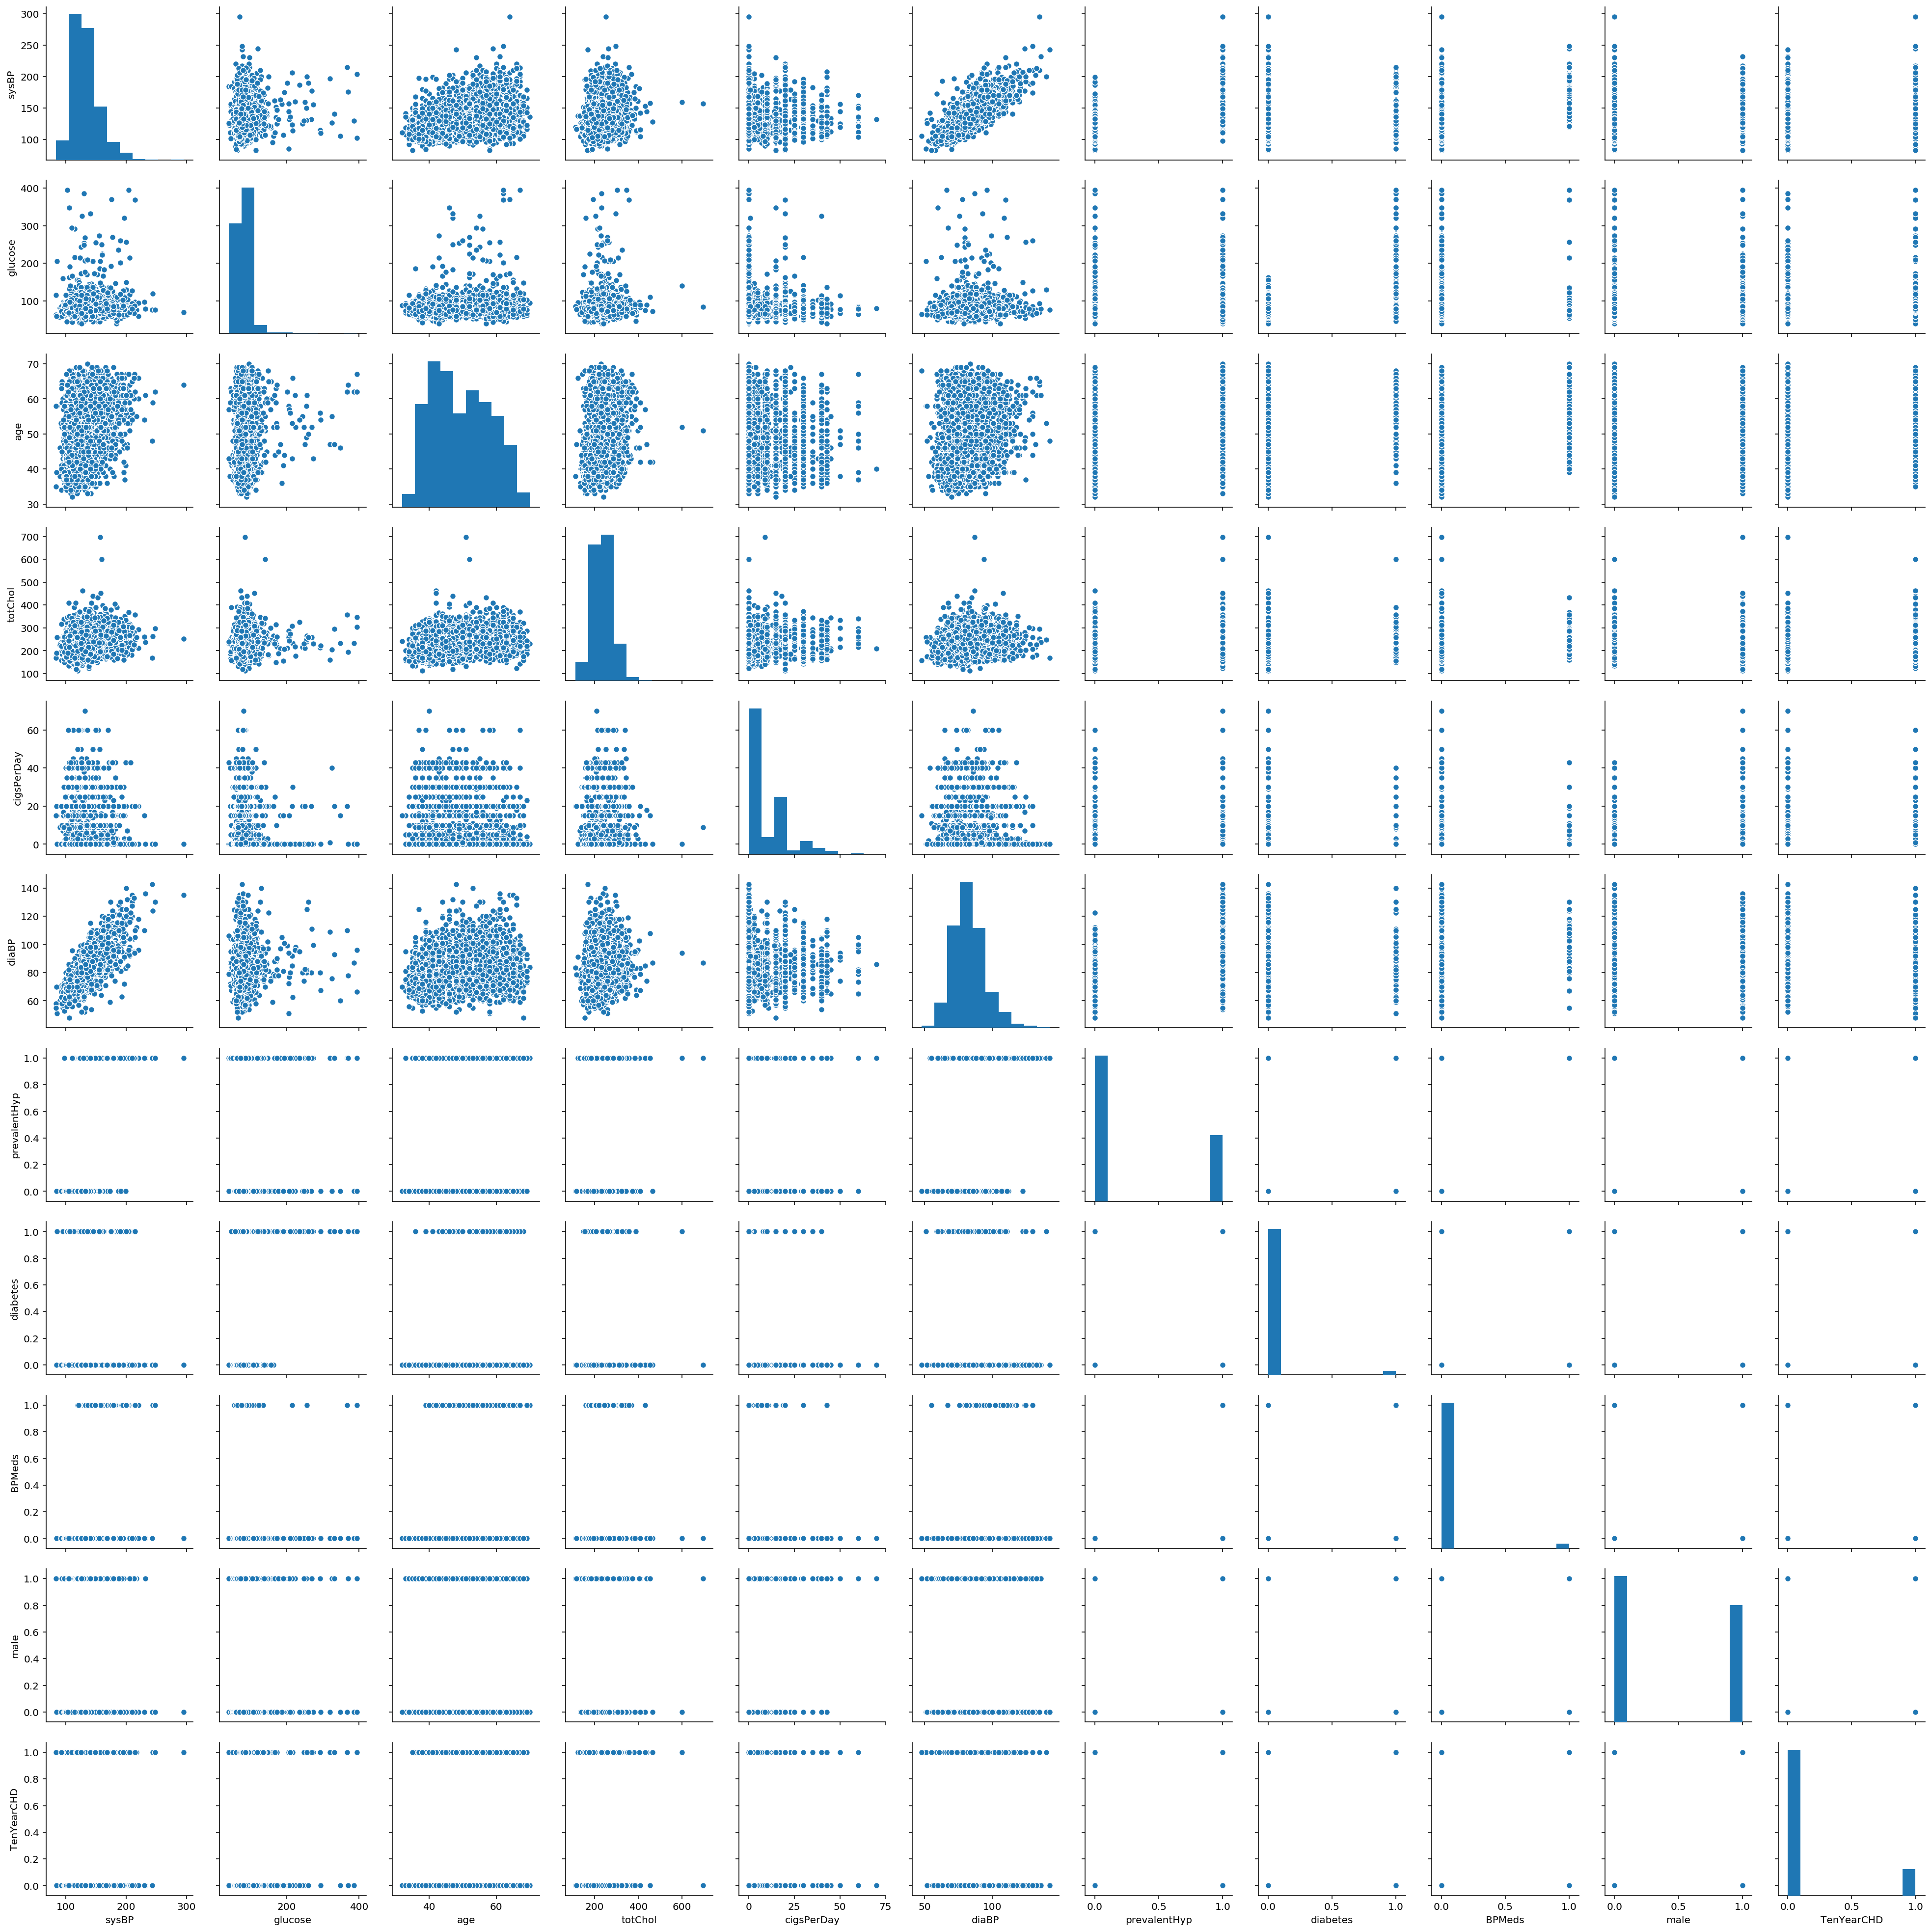

In [24]:
# Checking for outliers
df.describe()
sns.pairplot(df);

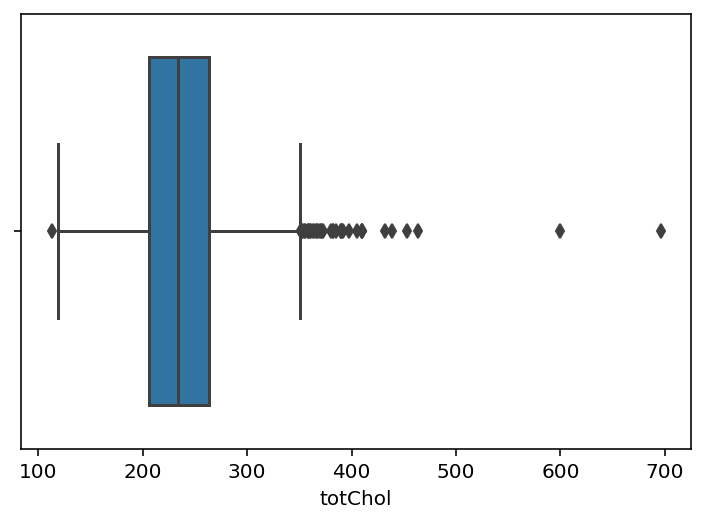

In [25]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers;

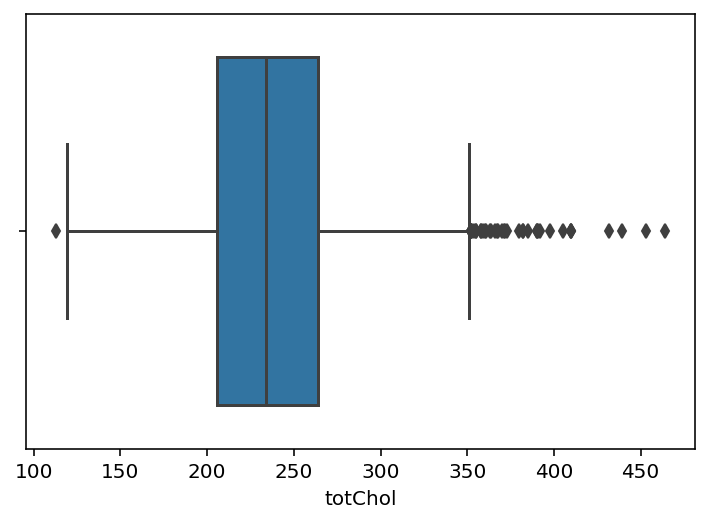

In [26]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol);

In [27]:
df_clean = df

## Feature Scaling <a name="feature_scaling"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [28]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [29]:
df_scaled.describe()
df.describe().T

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.230991,0.118260,0.462432,0.352447,0.128728,0.369677,0.311550,0.026941,0.030408,0.445185,0.152307
std,0.104228,0.067429,0.225589,0.124179,0.170391,0.126290,0.463189,0.161931,0.171730,0.497053,0.359366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.087571,0.263158,0.264957,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.107345,0.447368,0.344729,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.283688,0.132768,0.631579,0.430199,0.285714,0.444444,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
sysBP,3749.0,132.354628,22.044275,83.5,117.0,128.0,143.5,295.0
glucose,3749.0,81.863964,23.869703,40.0,71.0,78.0,87.0,394.0
age,3749.0,49.572419,8.572367,32.0,42.0,49.0,56.0,70.0
totChol,3749.0,236.708722,43.586786,113.0,206.0,234.0,264.0,464.0
cigsPerDay,3749.0,9.010936,11.927370,0.0,0.0,0.0,20.0,70.0
diaBP,3749.0,82.934516,11.934410,48.0,75.0,82.0,90.0,142.5
prevalentHyp,3749.0,0.311550,0.463189,0.0,0.0,0.0,1.0,1.0
diabetes,3749.0,0.026941,0.161931,0.0,0.0,0.0,0.0,1.0
BPMeds,3749.0,0.030408,0.171730,0.0,0.0,0.0,0.0,1.0
male,3749.0,0.445185,0.497053,0.0,0.0,0.0,1.0,1.0


## Test - Train Split <a name="test_train"></a>

In [30]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=25)

In [31]:
print("Total number of traning points are ",len(X_train))
print("Total number of testing points are ",len(X_test))

Total number of traning points are  2249
Total number of testing points are  1500


## Resampling imbalanced Dataset <a name="resample"></a>

Class 0: 3178
Class 1: 571
Proportion: 5.57 : 1


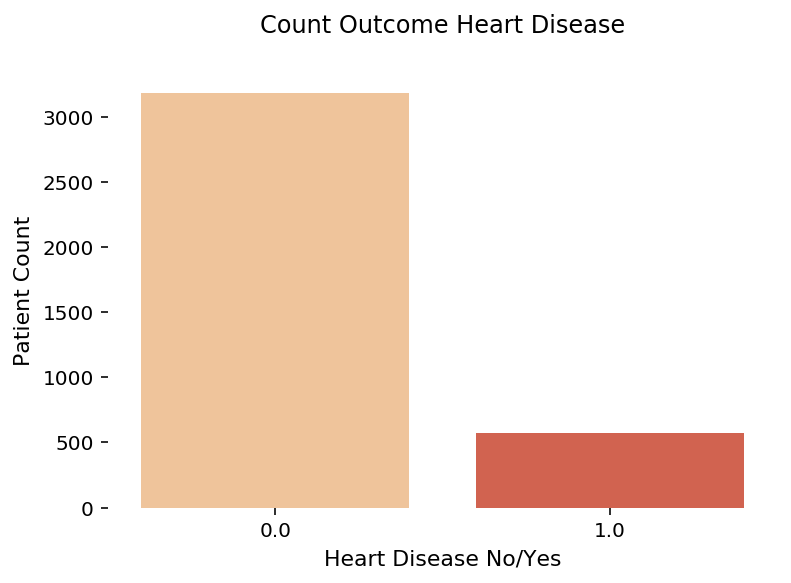

In [32]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show();

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


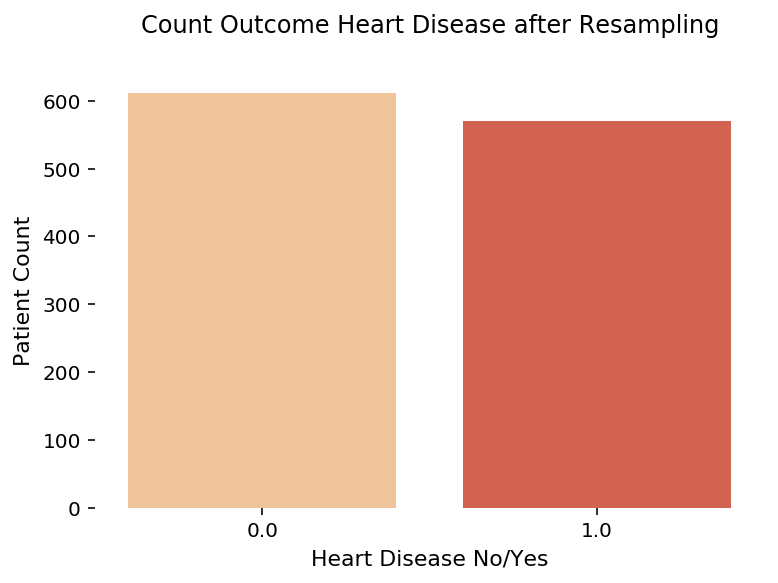

In [33]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show();

> ## **Model Pipeline** <a name="model"></a>

In [34]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    p = "The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100));
    print(p[:22] + p[-10:])
    

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

The accuracy score of is: 68.40%


Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

The accuracy score of is: 66.53%


Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

The accuracy score of is: 71.93%


Pipeline(memory=None,
         steps=[('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

The accuracy score of is: 80.93%


### Confusion Matrix
It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

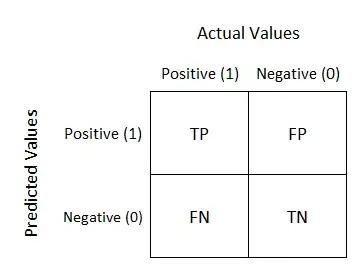

Type 1 Error: False Positive


Type 2 Error: False Negative

### Recall
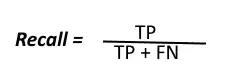

### Precision

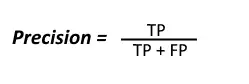

### F-Measure

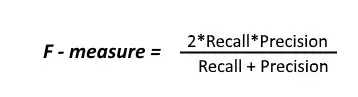

### Accuracy

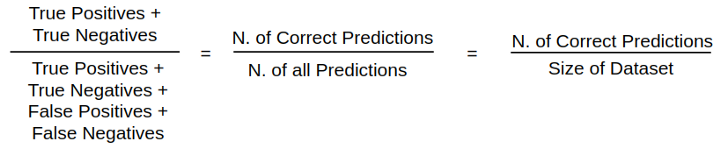

## Modelling & Evaluation (without Pipeline) <a name="model_evaluate"></a>

### 1. Logistic Regression

In [35]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, 
#     where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? 
#     True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 68.4%
The f1 score for LogReg is: 41.5%
The precision score for LogReg is: 29.5%
The recall score for LogReg is: 70.0%


### 2. SVM

In [36]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, 
#     where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? 
#     True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%");

The accuracy score for SVM is: 66.5%
The f1 score for SVM is: 40.2%
The precision score for SVM is: 28.199999999999996%
The recall score for SVM is: 70.39999999999999%


### 3. Decision Tree

In [37]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, 
#     where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? 
#    True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%");

The accuracy score for DTC is: 71.6%
The f1 score for DTC is: 53.0%
The precision score for DTC is: 36.0%
The recall score for DTC is: 100.0%


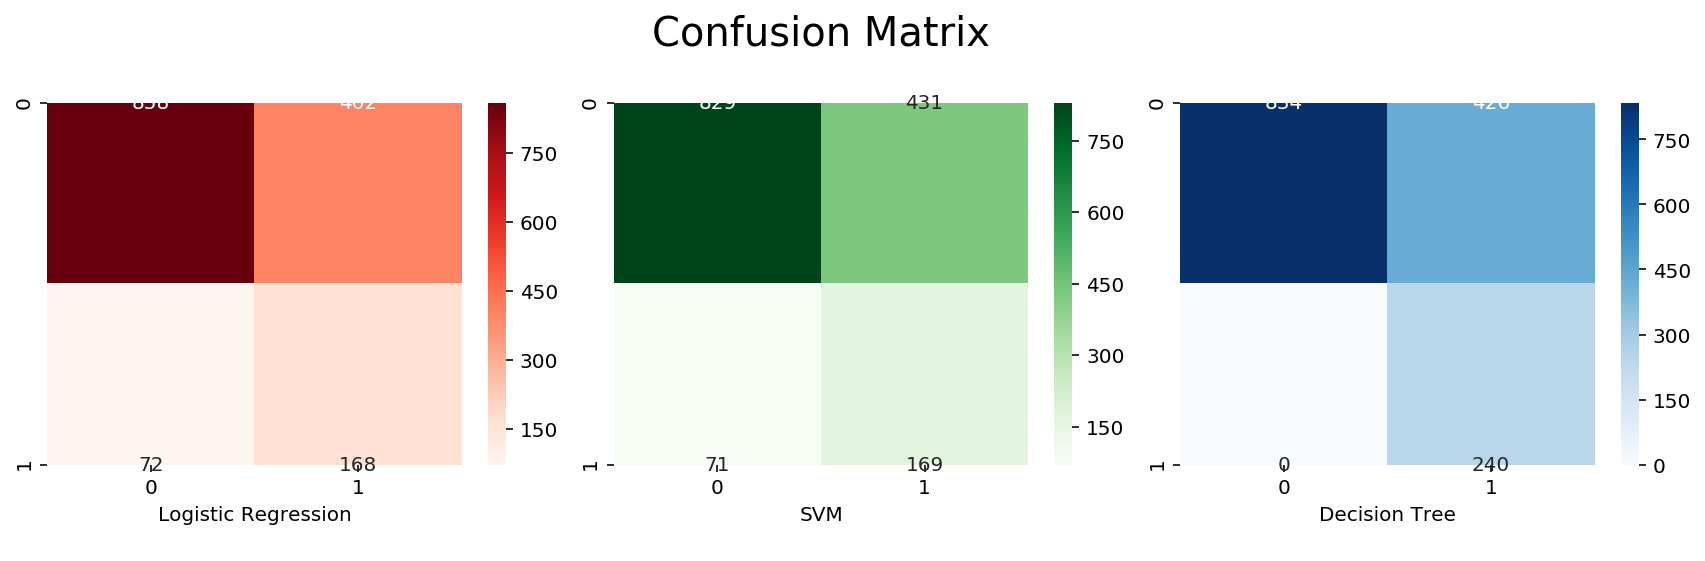

In [38]:
# plotting confusion matrix LogReg
plt.figure(figsize = (12,4))
plt.subplots_adjust(wspace=0.5, hspace=0.2,left = 0.4,bottom = 0.2)

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)
plt.subplot(131)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.xlabel('Logistic Regression\n', y=1.1)


# plotting confusion matrix SVM
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)
plt.subplot(132)

plt.title("Confusion Matrix\n", fontweight = 30, fontsize = 20)
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Greens" , fmt='g')
plt.tight_layout()
plt.xlabel('SVM\n', y=1.1)


# plotting confusion matrix Decision Tree
plt.subplot(133)
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Blues" , fmt='g')
plt.tight_layout()
plt.xlabel('Decision Tree\n', y=1.1);


### 4. KNN

In [39]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, 
#     where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? 
#     True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%");

The accuracy score for KNN is: 80.9%
The f1 score for KNN is: 48.6%
The precision score for KNN is: 42.699999999999996%
The recall score for KNN is: 56.2%


### Result: The KNN model has the highest accuracy score

In [40]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")


The accuracy score of the test data is:  80.93333333333334 %
The accuracy score of the training data is:  79.19 %


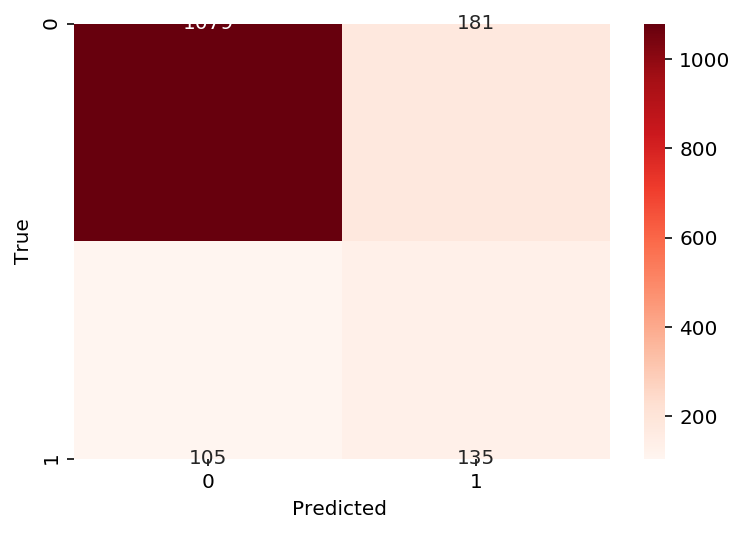

In [41]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds", fmt='g')

ax.set_xlabel('Predicted ')
ax.set_ylabel('True'); 

**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

**Cross Validation** is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set

In [42]:
# Perform cross validation

cv_results = cross_val_score(knn, X, y, cv=5)

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.83754993 0.83466667 0.83866667 0.84379172 0.8317757 ]
The Accuracy of Model with Cross Validation is: 83.73%


The **AUC ROC Curve** is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.

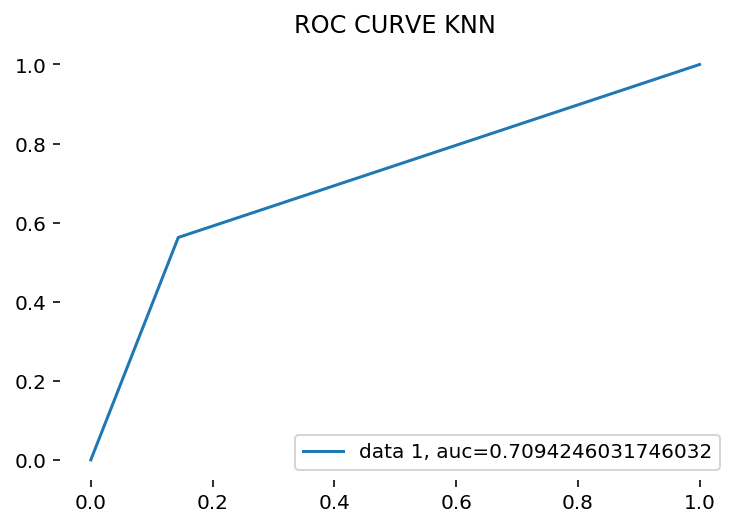

The score for the AUC ROC Curve is: 70.89999999999999%


In [43]:
# AU ROC CURVE KNN

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%");

## Applying the model <a name="apply"></a>

In [44]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    my_predictors.append(input("Patient's age: >>> "))
    my_predictors.append(input("Patient's gender. male=1, female=0: >>> "))
    my_predictors.append(input("Patient's smoked cigarettes per day: >>> "))
    my_predictors.append(input("Patient's systolic blood pressure: >>> "))
    my_predictors.append(input("Patient's diastolic blood pressure: >>> "))
    my_predictors.append(input("Patient's cholesterin level: >>> "))
    my_predictors.append(input("Was Patient hypertensive? Yes=1, No=0 >>> "))
    my_predictors.append(input("Did Patient have diabetes? Yes=1, No=0 >>> "))
    my_predictors.append(input("What is the Patient's glucose level? >>> "))
    my_predictors.append(input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> "))
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 22
Patient's gender. male=1, female=0: >>> 1
Patient's smoked cigarettes per day: >>> 0
Patient's systolic blood pressure: >>> 116
Patient's diastolic blood pressure: >>> 78
Patient's cholesterin level: >>> 200
Was Patient hypertensive? Yes=1, No=0 >>> 0
Did Patient have diabetes? Yes=1, No=0 >>> 0
What is the Patient's glucose level? >>> 105
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 0


Result:
The patient will develop a Heart Disease.
